In [ ]:
from fastai2.vision.all import *
from animal_sounds import *

In [ ]:
source = sounds_source()

In [ ]:
class ShowableTensor(ShowTitle, TensorBase): pass

In [ ]:
dblock = DataBlock((ImageBlock(PILImageBW), RegressionBlock(1)), get_items=get_files,
                   get_x=get_spec, get_y=[get_duration, lambda x: ShowableTensor(x)])

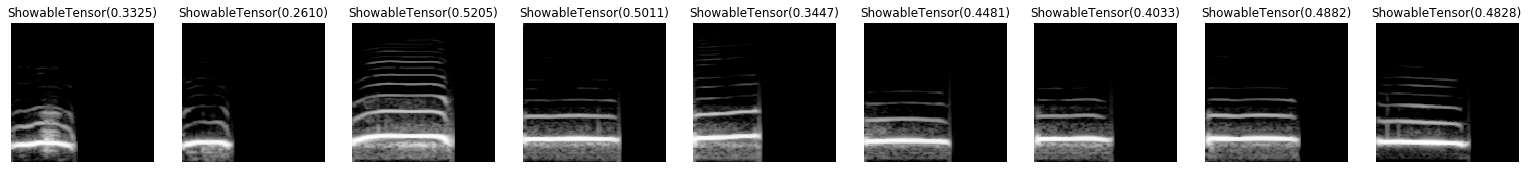

In [ ]:
dls = dblock.dataloaders(source, bs=64)
dls.show_batch(nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet18, loss_func=L1LossFlat())

In [ ]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,time
0,1.306251,0.636506,00:13


epoch,train_loss,valid_loss,time
0,0.822931,0.419414,00:13
1,0.468438,0.103514,00:13
2,0.253081,0.104256,00:13
3,0.180940,0.046157,00:13


In [ ]:
learn.fit_one_cycle(10, slice(1e-5,1e-3))

epoch,train_loss,valid_loss,time
0,0.071798,0.017809,00:13
1,0.076308,0.043115,00:13
2,0.082544,0.067001,00:13
3,0.075827,0.061658,00:13
4,0.062736,0.027963,00:13
5,0.069402,0.075584,00:13
6,0.057053,0.052785,00:13
7,0.053707,0.028886,00:13
8,0.048915,0.033215,00:13
9,0.049782,0.020262,00:13


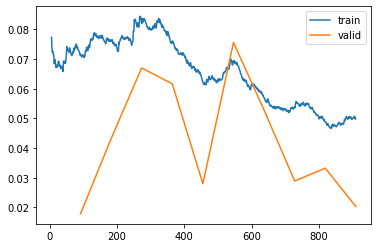

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.save_encoder('duration-encoder')

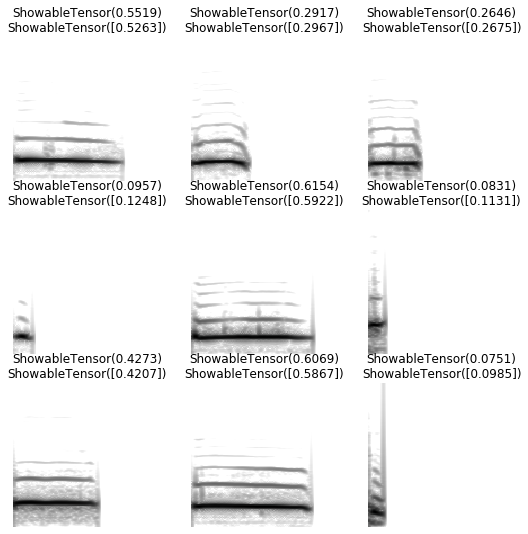

In [ ]:
learn.show_results()